<a href="https://colab.research.google.com/github/NaveedhAhmed-A/Hand-Written-Class-prediction-using-RNN/blob/main/mnist_class_prediction_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras import Model

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(train_images.shape)
test_images.shape

(60000, 28, 28)


(10000, 28, 28)

In [ ]:
train_images = train_images.reshape((60000,28,28)).astype('float32')/255.0
test_images = test_images.reshape((10000,28,28)).astype('float32')/255.0

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
input_shape = (28,28)
inputs = Input(shape = input_shape)
rnn_layer = LSTM(128)(inputs)
outputs = Dense(10,activation = 'softmax')(rnn_layer)
model = Model(inputs = inputs,outputs = outputs)

In [ ]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(train_images,train_labels,epochs = 20,validation_data = (test_images,test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7775 - loss: 0.6623 - val_accuracy: 0.9572 - val_loss: 0.1379
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9681 - loss: 0.1068 - val_accuracy: 0.9785 - val_loss: 0.0714
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9774 - loss: 0.0731 - val_accuracy: 0.9791 - val_loss: 0.0664
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9832 - loss: 0.0543 - val_accuracy: 0.9820 - val_loss: 0.0635
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9869 - loss: 0.0426 - val_accuracy: 0.9848 - val_loss: 0.0471
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9890 - loss: 0.0357 - val_accuracy: 0.9861 - val_loss: 0.0449
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9905 - loss: 0.0297 - val_accuracy: 0.9885 - val_loss: 0.0407
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9913 - loss: 0

In [ ]:
import matplotlib.pyplot as plt

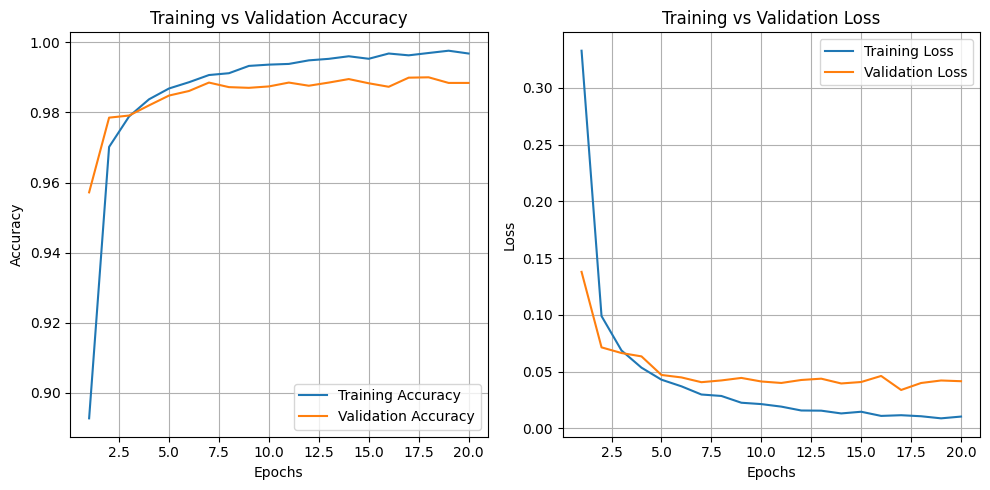

In [ ]:
epochs = range(1,21)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report

y_pred_probabilities = model.predict(test_images)
y_pred = np.argmax(y_pred_probabilities, axis=1)
y_true = np.argmax(test_labels, axis=1)

conf_mat = confusion_matrix(y_true, y_pred)
clas_rep = classification_report(y_true, y_pred)

print("Confusion matrix \n")
print(conf_mat)
print()
print()
print("Classification report \n")
print(clas_rep)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion matrix 

[[ 966    0    0    0    1    1   10    2    0    0]
 [   0 1132    0    1    0    0    2    0    0    0]
 [   2    0 1026    1    0    0    0    3    0    0]
 [   0    0    4 1002    0    2    0    2    0    0]
 [   0    0    0    0  958    0    6    1    1   16]
 [   1    0    1    6    0  882    1    1    0    0]
 [   0    3    0    0    1    1  951    0    1    1]
 [   0    4    7    0    2    0    0 1012    0    3]
 [   1    0    2    3    0    5    0    3  958    2]
 [   0    0    0    2    2    3    0    3    2  997]]


Classification report 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.99      0.99       892
    